In [1]:
from config import weather_api_key
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.

x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
practice_coords = zip(x, y)

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
cities = []

for i in coordinates:
    x = citipy.nearest_city(i[0],i[1])
    cities.append(x.city_name.capitalize())
    print(x.city_name.capitalize(), x.country_code.upper())

Taolanaro MG
Port alfred ZA
Albany AU
Qaanaaq GL
Rikitea PF
Ximei CN
Lata SB
Bredasdorp ZA
Punta arenas CL
Dakar SN
Ribeira grande PT
Neiafu TO
Hasaki JP
Cairns AU
Sassandra CI
Tuktoyaktuk CA
Palkonda IN
Kushiro JP
Illoqqortoormiut GL
Kongolo CD
Saldanha ZA
Mataura PF
Bluff NZ
Ushuaia AR
Geraldton AU
Agadir MA
Fort nelson CA
Amalfi CO
Taolanaro MG
Mataura PF
Rikitea PF
Kieta PG
Carnarvon AU
Sigulda LV
Margate ZA
Bilibino RU
Kaitangata NZ
Castro CL
Nikolskoye RU
Ushuaia AR
Rikitea PF
Albany AU
Longyearbyen SJ
Nikolskoye RU
Skibbereen IE
Bojnurd IR
Ushuaia AR
Shanting CN
Port elizabeth ZA
Hurghada EG
Carnarvon AU
Plouzane FR
Codrington AG
Sitka US
Kolyvan RU
Pevek RU
Rikitea PF
Saint-pierre PM
Tuktoyaktuk CA
Rodeo MX
Westport NZ
Jamestown SH
Bandarbeyla SO
Guerrero negro MX
Hermanus ZA
Port elizabeth ZA
Mataura PF
Iqaluit CA
Moron MN
Esperance AU
Busselton AU
Avarua CK
Sabang ID
Constitucion MX
Kavieng PG
East london ZA
Wanning CN
Mys shmidta RU
Sorland NO
Terrace CA
Nandu CN
Taolanaro M

Taksimo RU
Saint-philippe RE
Norman wells CA
Willowmore ZA
Saint george BM
Kamenka RU
Lorengau PG
Yellowknife CA
Springdale CA
Denia ES
Butaritari KI
Hithadhoo MV
Nong han TH
Airai PW
San quintin MX
Saskylakh RU
Atherton AU
Nanortalik GL
Kutum SD
Albany AU
Cidreira BR
Bredasdorp ZA
Atuona PF
Codrington AG
Salisbury US
Lasa CN
Punta arenas CL
Tasbuget KZ
Guerrero negro MX
Punta arenas CL
Rikitea PF
Ushuaia AR
Abha SA
Chuzhou CN
Bin qirdan TN
Chuzhou CN
Bathsheba BB
Torbay CA
Hithadhoo MV
Dunedin NZ
Yellowknife CA
Mys shmidta RU
Kuche CN
Tiksi RU
Samusu WS
Yellowknife CA
Carballo ES
Kodiak US
Khatanga RU
Umzimvubu ZA
Mataura PF
Tenenkou ML
Kodiak US
Leningradskiy RU
Andenes NO
Acapulco MX
Amderma RU
Viligili MV
Butaritari KI
Atbasar KZ
Rikitea PF
Cidreira BR
Karaul RU
Hay river CA
Grand gaube MU
Gigmoto PH
Butaritari KI
Kahului US
Georgetown SH
Ampanihy MG
Chokurdakh RU
Belushya guba RU
Filadelfia PY
Victoria SC
Mataura PF
Saint-philippe RE
Hilo US
Butaritari KI
Taolanaro MG
Palabuhanrat

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4d22b5de6829c12a403e8c97654446


In [7]:
fuckyou = requests.get(url+'&q='+'chicago').json()
fuckyou

{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 50.18,
  'feels_like': 45.7,
  'temp_min': 48.99,
  'temp_max': 51.01,
  'pressure': 1028,
  'humidity': 17},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 180, 'gust': 23.02},
 'clouds': {'all': 20},
 'dt': 1617404610,
 'sys': {'type': 1,
  'id': 4861,
  'country': 'US',
  'sunrise': 1617363064,
  'sunset': 1617409003},
 'timezone': -18000,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [8]:
fuck = []
for i in cities[:10]:
    try:
        x = requests.get(url+"&q="+i.capitalize()).json()
        lat = x["coord"]["lat"]
        lon = x["coord"]["lon"]
        nam = x["name"]
        fuck.append({"Name":nam,"Lat": lat, "Lon":lon})
    except:
        print(f'fuck, {i} is no good.')
fuck

fuck, Taolanaro is no good.


[{'Name': 'Port Alfred', 'Lat': -33.5906, 'Lon': 26.891},
 {'Name': 'Albany', 'Lat': 42.6001, 'Lon': -73.9662},
 {'Name': 'Qaanaaq', 'Lat': 77.484, 'Lon': -69.3632},
 {'Name': 'Rikitea', 'Lat': -23.1203, 'Lon': -134.9692},
 {'Name': 'Ximeicun', 'Lat': 24.9639, 'Lon': 118.3794},
 {'Name': 'Lata', 'Lat': 40.1629, 'Lon': -8.3327},
 {'Name': 'Bredasdorp', 'Lat': -34.5322, 'Lon': 20.0403},
 {'Name': 'Punta Arenas', 'Lat': -53.15, 'Lon': -70.9167},
 {'Name': 'Dakar', 'Lat': 14.6937, 'Lon': -17.4441}]

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | Port alfred
Processing Record 3 of Set 1 | Albany
Processing Record 4 of Set 1 | Qaanaaq
Processing Record 5 of Set 1 | Rikitea
Processing Record 6 of Set 1 | Ximei
Processing Record 7 of Set 1 | Lata
Processing Record 8 of Set 1 | Bredasdorp
Processing Record 9 of Set 1 | Punta arenas
Processing Record 10 of Set 1 | Dakar
Processing Record 11 of Set 1 | Ribeira grande
Processing Record 12 of Set 1 | Neiafu
Processing Record 13 of Set 1 | Hasaki
Processing Record 14 of Set 1 | Cairns
Processing Record 15 of Set 1 | Sassandra
Processing Record 16 of Set 1 | Tuktoyaktuk
Processing Record 17 of Set 1 | Palkonda
Processing Record 18 of Set 1 | Kushiro
Processing Record 19 of Set 1 | Illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | Kongolo
Processing Record 21 of Set 1 | Saldanha
Processing Record 22 of Se

Processing Record 39 of Set 4 | Verkhnetulomskiy
Processing Record 40 of Set 4 | Waipawa
Processing Record 41 of Set 4 | Padang
Processing Record 42 of Set 4 | Georgetown
Processing Record 43 of Set 4 | Saint george
Processing Record 44 of Set 4 | Kachug
Processing Record 45 of Set 4 | Port elizabeth
Processing Record 46 of Set 4 | Saint-philippe
Processing Record 47 of Set 4 | Tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | Salalah
Processing Record 49 of Set 4 | Zelenoborsk
Processing Record 50 of Set 4 | Richards bay
Processing Record 1 of Set 5 | Lebu
Processing Record 2 of Set 5 | Nantucket
Processing Record 3 of Set 5 | Mataura
Processing Record 4 of Set 5 | Mersing
Processing Record 5 of Set 5 | Artyk
City not found. Skipping...
Processing Record 6 of Set 5 | Cape town
Processing Record 7 of Set 5 | San patricio
Processing Record 8 of Set 5 | Upernavik
Processing Record 9 of Set 5 | Huilong
Processing Record 10 of Set 5 | Chokurdakh
Processing Record 11 of S

Processing Record 25 of Set 8 | Poum
Processing Record 26 of Set 8 | Tuktoyaktuk
Processing Record 27 of Set 8 | Shimoda
Processing Record 28 of Set 8 | Te anau
Processing Record 29 of Set 8 | Saint-philippe
Processing Record 30 of Set 8 | Chuy
Processing Record 31 of Set 8 | Port hedland
Processing Record 32 of Set 8 | Esperance
Processing Record 33 of Set 8 | Nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 8 | Kodiak
Processing Record 35 of Set 8 | Victoria
Processing Record 36 of Set 8 | East london
Processing Record 37 of Set 8 | Jalu
Processing Record 38 of Set 8 | Nemuro
Processing Record 39 of Set 8 | Port elizabeth
Processing Record 40 of Set 8 | Ushuaia
Processing Record 41 of Set 8 | Lazaro cardenas
Processing Record 42 of Set 8 | Atuona
Processing Record 43 of Set 8 | Big spring
Processing Record 44 of Set 8 | Kavieng
Processing Record 45 of Set 8 | Huicheng
Processing Record 46 of Set 8 | Oudtshoorn
Processing Record 47 of Set 8 | Luderitz
Processing Rec

Processing Record 14 of Set 12 | Rikitea
Processing Record 15 of Set 12 | Nikolskoye
Processing Record 16 of Set 12 | Kaeo
Processing Record 17 of Set 12 | Beringovskiy
Processing Record 18 of Set 12 | Barentsburg
City not found. Skipping...
Processing Record 19 of Set 12 | Tiksi
Processing Record 20 of Set 12 | Punta arenas
Processing Record 21 of Set 12 | Haines junction
Processing Record 22 of Set 12 | Sentyabrskiy
City not found. Skipping...
Processing Record 23 of Set 12 | Khatanga
Processing Record 24 of Set 12 | Cape town
Processing Record 25 of Set 12 | Half moon bay
Processing Record 26 of Set 12 | Rikitea
Processing Record 27 of Set 12 | Saskylakh
Processing Record 28 of Set 12 | Yarada
Processing Record 29 of Set 12 | Ushuaia
Processing Record 30 of Set 12 | Cockburn town
Processing Record 31 of Set 12 | Qaanaaq
Processing Record 32 of Set 12 | Kodiak
Processing Record 33 of Set 12 | Carnarvon
Processing Record 34 of Set 12 | Kapaa
Processing Record 35 of Set 12 | Mayo
Proce

Processing Record 2 of Set 16 | Ponta do sol
Processing Record 3 of Set 16 | Skuodas
Processing Record 4 of Set 16 | Butaritari
Processing Record 5 of Set 16 | Burgos
Processing Record 6 of Set 16 | Albany
Processing Record 7 of Set 16 | Ivanivka
Processing Record 8 of Set 16 | Belton
Processing Record 9 of Set 16 | Lorengau
Processing Record 10 of Set 16 | Sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 16 | Sisimiut
Processing Record 12 of Set 16 | Castro
Processing Record 13 of Set 16 | Amderma
City not found. Skipping...
Processing Record 14 of Set 16 | Ponta do sol
Processing Record 15 of Set 16 | Monster
Processing Record 16 of Set 16 | Hobart
Processing Record 17 of Set 16 | Busselton
Processing Record 18 of Set 16 | Arraial do cabo
Processing Record 19 of Set 16 | Rikitea
Processing Record 20 of Set 16 | Oksfjord
Processing Record 21 of Set 16 | Makueni
Processing Record 22 of Set 16 | East london
Processing Record 23 of Set 16 | Hobart
Processing Record 24

Processing Record 35 of Set 19 | Punta arenas
Processing Record 36 of Set 19 | Rikitea
Processing Record 37 of Set 19 | Ushuaia
Processing Record 38 of Set 19 | Abha
Processing Record 39 of Set 19 | Chuzhou
Processing Record 40 of Set 19 | Bin qirdan
Processing Record 41 of Set 19 | Chuzhou
Processing Record 42 of Set 19 | Bathsheba
Processing Record 43 of Set 19 | Torbay
Processing Record 44 of Set 19 | Hithadhoo
Processing Record 45 of Set 19 | Dunedin
Processing Record 46 of Set 19 | Yellowknife
Processing Record 47 of Set 19 | Mys shmidta
City not found. Skipping...
Processing Record 48 of Set 19 | Kuche
City not found. Skipping...
Processing Record 49 of Set 19 | Tiksi
Processing Record 50 of Set 19 | Samusu
City not found. Skipping...
Processing Record 1 of Set 20 | Yellowknife
Processing Record 2 of Set 20 | Carballo
Processing Record 3 of Set 20 | Kodiak
Processing Record 4 of Set 20 | Khatanga
Processing Record 5 of Set 20 | Umzimvubu
City not found. Skipping...
Processing Rec

Processing Record 21 of Set 23 | Flinders
Processing Record 22 of Set 23 | Vaini
Processing Record 23 of Set 23 | Atuona
Processing Record 24 of Set 23 | Hobart
Processing Record 25 of Set 23 | Poum
Processing Record 26 of Set 23 | Mataura
Processing Record 27 of Set 23 | Saint-jean-de-maurienne
Processing Record 28 of Set 23 | Georgetown
Processing Record 29 of Set 23 | Namatanai
Processing Record 30 of Set 23 | Ushuaia
Processing Record 31 of Set 23 | San juan
Processing Record 32 of Set 23 | Ponta do sol
Processing Record 33 of Set 23 | Saint george
Processing Record 34 of Set 23 | Chernyshevskiy
Processing Record 35 of Set 23 | Sao joao da barra
Processing Record 36 of Set 23 | Bluff
Processing Record 37 of Set 23 | Gizo
Processing Record 38 of Set 23 | Samusu
City not found. Skipping...
Processing Record 39 of Set 23 | Clyde river
Processing Record 40 of Set 23 | Lieksa
Processing Record 41 of Set 23 | Puerto ayora
Processing Record 42 of Set 23 | Chingirlau
Processing Record 43 o

Processing Record 1 of Set 27 | Vila franca do campo
Processing Record 2 of Set 27 | Puerto ayora
Processing Record 3 of Set 27 | Georgetown
Processing Record 4 of Set 27 | Chuy
Processing Record 5 of Set 27 | Kardla
Processing Record 6 of Set 27 | Illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 27 | Mataura
Processing Record 8 of Set 27 | Carnarvon
Processing Record 9 of Set 27 | Artyk
City not found. Skipping...
Processing Record 10 of Set 27 | Miguel hidalgo
Processing Record 11 of Set 27 | Puerto ayora
Processing Record 12 of Set 27 | Kilimatinde
Processing Record 13 of Set 27 | Faanui
Processing Record 14 of Set 27 | Port hardy
Processing Record 15 of Set 27 | Alyangula
Processing Record 16 of Set 27 | Kavieng
Processing Record 17 of Set 27 | Lavrentiya
Processing Record 18 of Set 27 | Haines junction
Processing Record 19 of Set 27 | Yellowknife
Processing Record 20 of Set 27 | Hilo
Processing Record 21 of Set 27 | Paoua
Processing Record 22 of Set 27 | Kap

Processing Record 34 of Set 30 | Pittsfield
Processing Record 35 of Set 30 | Mar del plata
Processing Record 36 of Set 30 | Berlevag
Processing Record 37 of Set 30 | Codrington
Processing Record 38 of Set 30 | Vytegra
Processing Record 39 of Set 30 | Qaanaaq
Processing Record 40 of Set 30 | Inuvik
Processing Record 41 of Set 30 | Georgetown
Processing Record 42 of Set 30 | Qaanaaq
Processing Record 43 of Set 30 | Carnarvon
Processing Record 44 of Set 30 | Mataura
Processing Record 45 of Set 30 | Tuktoyaktuk
Processing Record 46 of Set 30 | Vaini
Processing Record 47 of Set 30 | Kirakira
Processing Record 48 of Set 30 | Busselton
Processing Record 49 of Set 30 | Taolanaro
City not found. Skipping...
Processing Record 50 of Set 30 | Saint-philippe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

1372

# 6.2.7

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,60.96,83,24,10.65,ZA,2021-04-02 23:04:10
1,Albany,42.6001,-73.9662,37.00,27,100,1.01,US,2021-04-02 23:04:07
2,Qaanaaq,77.4840,-69.3632,-20.47,83,100,8.01,GL,2021-04-02 23:04:07
3,Rikitea,-23.1203,-134.9692,77.45,76,93,10.76,PF,2021-04-02 23:04:08
4,Ximei,24.9639,118.3794,68.00,100,90,4.47,CN,2021-04-02 23:04:08
5,Lata,40.1629,-8.3327,57.00,94,45,0.56,PT,2021-04-02 23:04:08
6,Bredasdorp,-34.5322,20.0403,48.20,93,46,4.61,ZA,2021-04-02 23:04:09
7,Punta Arenas,-53.1500,-70.9167,46.40,87,75,5.75,CL,2021-04-02 23:04:11
8,Dakar,14.6937,-17.4441,69.80,78,19,3.44,SN,2021-04-02 22:59:33
9,Ribeira Grande,38.5167,-28.7000,61.66,81,99,24.74,PT,2021-04-02 23:04:12


In [14]:
column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data = city_data_df[column_order]
city_data

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-04-02 23:04:10,-33.5906,26.8910,60.96,83,24,10.65
1,Albany,US,2021-04-02 23:04:07,42.6001,-73.9662,37.00,27,100,1.01
2,Qaanaaq,GL,2021-04-02 23:04:07,77.4840,-69.3632,-20.47,83,100,8.01
3,Rikitea,PF,2021-04-02 23:04:08,-23.1203,-134.9692,77.45,76,93,10.76
4,Ximei,CN,2021-04-02 23:04:08,24.9639,118.3794,68.00,100,90,4.47
...,...,...,...,...,...,...,...,...,...
1367,Tuktoyaktuk,CA,2021-04-02 23:04:13,69.4541,-133.0374,-13.00,70,75,6.91
1368,Vaini,TO,2021-04-02 23:05:15,-21.2000,-175.2000,82.40,83,75,5.75
1369,Kirakira,SB,2021-04-02 23:04:48,-10.4544,161.9205,85.21,67,88,5.93
1370,Busselton,AU,2021-04-02 23:04:26,-33.6500,115.3333,63.00,83,100,1.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1

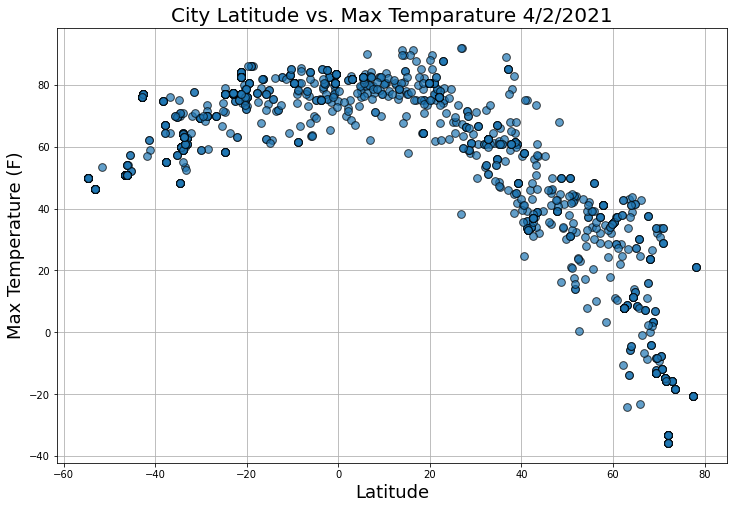

In [38]:
#Scatter plots - Latitude vs Max Temp - All by myself :)
plt.subplots(figsize=(12,8))

plt.scatter(city_data['Lat'], city_data['Max Temp'], edgecolor="black",zorder=2, alpha=0.7, s=60)

plt.title('City Latitude vs. Max Temparature 4/2/2021', fontsize=20)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Max Temperature (F)',fontsize=18)
plt.grid()
plt.show()

In [39]:
#now following the unit
# Extract relevant fields from the DataFrame for plotting.
lats = city_data["Lat"]
max_temps = city_data["Max Temp"]
humidity = city_data["Humidity"]
cloudiness = city_data["Cloudiness"]
wind_speed = city_data["Wind Speed"]

In [40]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617405387.5469406

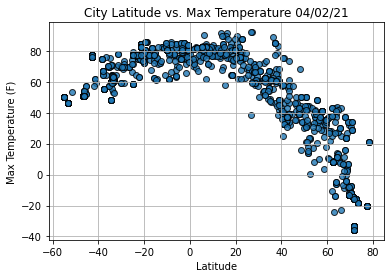

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [42]:
#wow it looks just like mine ;)

# 6.3.2

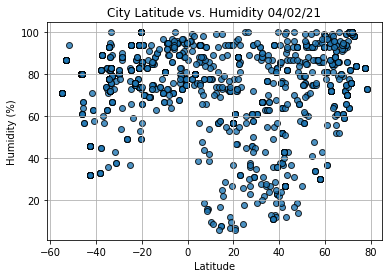

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3

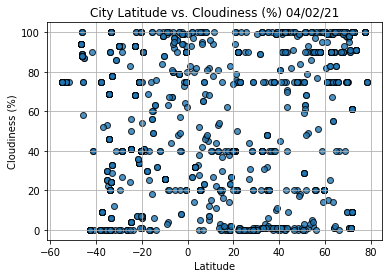

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4

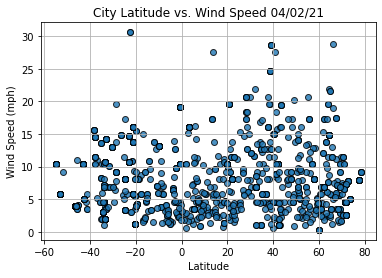

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.1